# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [161]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [162]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [163]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [164]:
# drop rows with missing math 8 and math 4 scores
# we want to use math 4 as a predictor for math 8, so we will ignore rows without those scores

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.isna().sum()
df.dropna(subset=['AVG_MATH_4_SCORE'], inplace=True)
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  167
TOTAL_REVENUE                   125
FEDERAL_REVENUE                 125
STATE_REVENUE                   125
LOCAL_REVENUE                   125
TOTAL_EXPENDITURE               125
INSTRUCTION_EXPENDITURE         125
SUPPORT_SERVICES_EXPENDITURE    125
OTHER_EXPENDITURE               167
CAPITAL_OUTLAY_EXPENDITURE      125
ENROLL_PREK                      78
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  167
ENROLL_HS                       116
ENROLL_ALL                       74
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              43
AVG_READING_8_SCORE              86
dtype: int64

In [165]:
# fill in estimates with actual like the tutorial
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                   74
TOTAL_REVENUE                   125
FEDERAL_REVENUE                 125
STATE_REVENUE                   125
LOCAL_REVENUE                   125
TOTAL_EXPENDITURE               125
INSTRUCTION_EXPENDITURE         125
SUPPORT_SERVICES_EXPENDITURE    125
OTHER_EXPENDITURE               167
CAPITAL_OUTLAY_EXPENDITURE      125
ENROLL_PREK                      78
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  167
ENROLL_HS                       116
ENROLL_ALL                       74
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              43
AVG_READING_8_SCORE              86
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [166]:
len(df['YEAR'].unique())

13

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [167]:
mich_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()
print(mich_avg)
print(ohio_avg)
print("Ohio has the higher avergae across all years")

277.27272727272725
283.90909090909093
Ohio has the higher avergae across all years


Find the average for your chosen test across all states in 2019

In [168]:
avg2019 = df[df['YEAR'] == 2019]["AVG_MATH_8_SCORE"].mean()
avg2019

281.2641509433962

For each state, find a maximum value for your chosen test score

In [169]:
df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [170]:
# add columns to describe expenditures as a percentage of revenue
df['SUPPORT_SERVICES_EXPENDITURE_PER'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df["TOTAL_REVENUE"]
df['TOTAL_EXPENDITURE_PER'] = df['TOTAL_EXPENDITURE'] / df["TOTAL_REVENUE"]
df['INSTRUCTION_EXPENDITURE_PER'] = df['INSTRUCTION_EXPENDITURE'] / df["TOTAL_REVENUE"]
df['OTHER_EXPENDITURE_PER'] = df['OTHER_EXPENDITURE'] / df["TOTAL_REVENUE"]
df['CAPITAL_OUTLAY_EXPENDITURE_PER'] = df['CAPITAL_OUTLAY_EXPENDITURE'] / df["TOTAL_REVENUE"]


In [171]:
# scale all expenditures to be per student
df['SUPPORT_SERVICES_EXPENDITURE'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['TOTAL_EXPENDITURE'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['OTHER_EXPENDITURE'] = df['OTHER_EXPENDITURE'] / df['ENROLL_ALL']
df['CAPITAL_OUTLAY_EXPENDITURE'] = df['CAPITAL_OUTLAY_EXPENDITURE'] / df['ENROLL_ALL']
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER,TOTAL_EXPENDITURE_PER,INSTRUCTION_EXPENDITURE_PER,OTHER_EXPENDITURE_PER,CAPITAL_OUTLAY_EXPENDITURE_PER
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,3.627221,2.025197,...,731634.0,208.0,252.0,207.0,NaN,0.274381,0.990635,0.553104,NaN,0.064972
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,5.050774,2.132082,...,673477.0,215.0,265.0,209.0,NaN,0.309303,1.044045,0.440722,NaN,0.186955
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,3.948044,2.184247,...,441490.0,210.0,256.0,211.0,NaN,0.282418,1.018145,0.563286,NaN,0.084822
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,5.164536,2.732512,...,5254844.0,208.0,261.0,202.0,NaN,0.324483,1.033466,0.546798,NaN,0.077863
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,5.329154,2.680986,...,612635.0,221.0,272.0,217.0,NaN,0.325248,1.025007,0.515660,NaN,0.114518


Feature engineering justification: I added columns to describe expenditures as a percentage of total revenue. This could help describe how much a state prioritizes spending on a type of expenditure. I then scaled each expenditure variable to be per student because different states have different student populations, so it is does not make sense to compare gross expenditures


<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

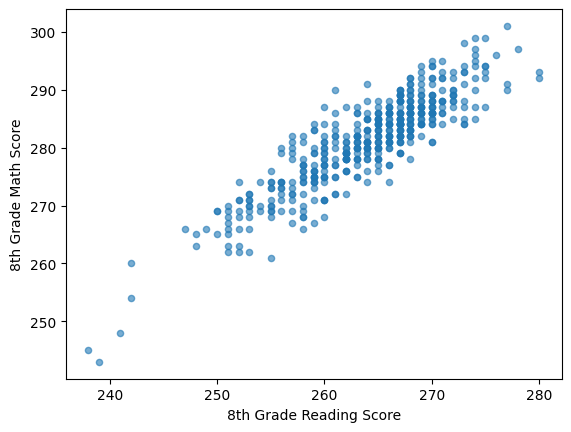

In [172]:
df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**8th grade reading scores vs 8th grade math scores**: It seems that there is a positive correlation between 8th gradde reading scores and 8th grade math scores. The relationship appears to be linear.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

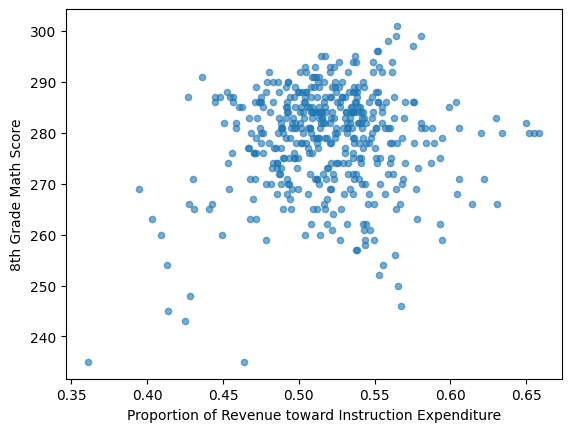

In [173]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Proportion of Revenue toward Instruction Expenditure')
plt.ylabel('8th Grade Math Score')

**Proportion of Revenue toward Instruction Expenditure vs 8th grade Math Scores** There seems to be a slight positive relationship between the percentage of revenue spent on instruction and 8th grade math scores. However, we see a lot of variability for math scores for a given percentage of revenue expenditure.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X = df[['ENROLL_8','AVG_READING_8_SCORE','AVG_READING_4_SCORE', 'AVG_MATH_4_SCORE', 'SUPPORT_SERVICES_EXPENDITURE_PER', 
        'TOTAL_EXPENDITURE_PER', 'INSTRUCTION_EXPENDITURE_PER', 'CAPITAL_OUTLAY_EXPENDITURE_PER', 'SUPPORT_SERVICES_EXPENDITURE',
        'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE'] # has no na
# y.isna().sum()

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [177]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [178]:
# create your model here
model = LinearRegression()

In [179]:
model.fit(X_train, y_train)

LinearRegression()

In [180]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [181]:
# R^2
model.score(X_test, y_test)

0.9378542480599712

In [182]:
#RMSE
np.mean((model.predict(X_test)-y_test)**2)**0.5

2.004432995663441

In [183]:
#MAE
np.mean(np.abs(model.predict(X_test)-y_test))

1.6231521987372142

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

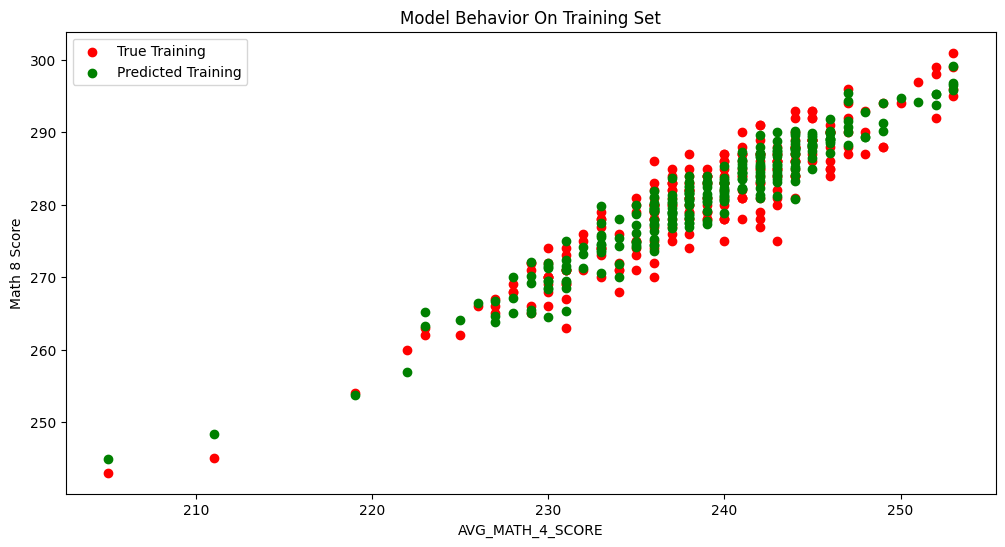

In [184]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

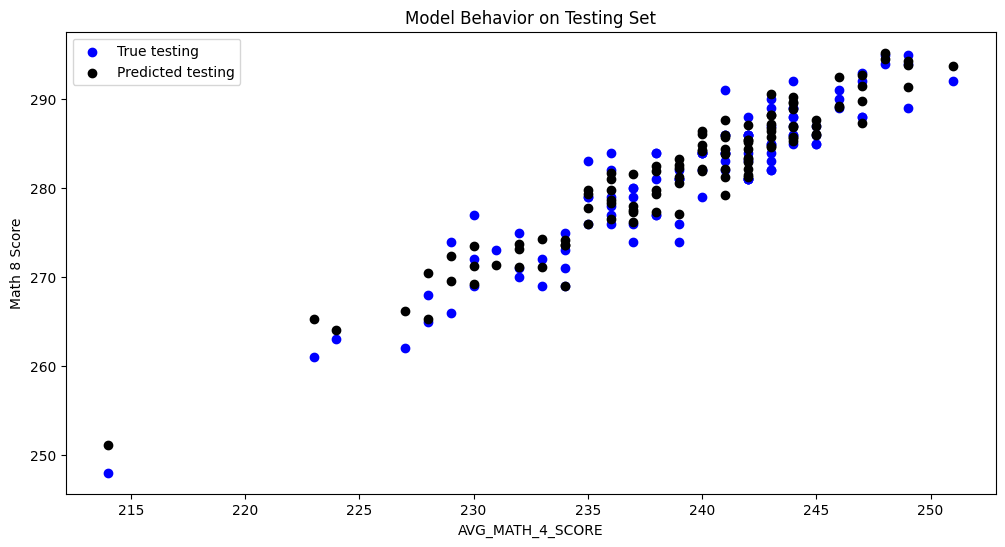

In [185]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')
plt.title("Model Behavior on Testing Set")